In [4]:
%matplotlib notebook

2020-02-19 15:01:56,735 - matplotlib.pyplot - DEBUG - Loaded backend nbAgg version unknown.


In [2]:
import numpy as np
import pandas as pd

from desdeo_problem.testproblems.TestProblems import test_problem_builder

from desdeo_emo.EAs.NIMBUS_RVEA import NIMBUS_RVEA
import plotly.express as ex
from pygmo import fast_non_dominated_sorting as nds

In [5]:
import matplotlib.pyplot as plt

In [6]:
problem = test_problem_builder(name="ZDT1")

In [7]:
problem.ideal = np.asarray([0, 0])
problem.nadir = np.asarray([1, 1])

In [8]:
evolver = NIMBUS_RVEA(problem, n_gen_per_iter=200)

In [24]:
plot, pref = evolver.requests()

In [37]:
response = np.asarray([[0.9,0.1]])
pref.response = pd.DataFrame(response, columns=pref.content['dimensions_data'].columns)

In [38]:
plot, pref = evolver.iterate(pref)

<IPython.core.display.Javascript object>


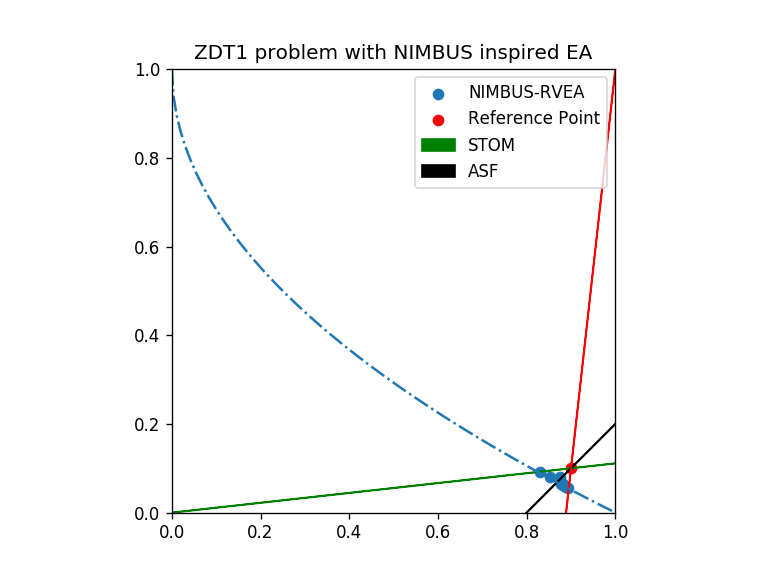

In [39]:
scaled_data = np.asarray([scalar(evolver.population.fitness, response) for scalar in evolver.scalarization_methods]).T
non_dom_ids = nds(scaled_data)[0][0]


nimbus = plt.scatter(
    x=evolver.population.objectives[non_dom_ids, 0],
    y=evolver.population.objectives[non_dom_ids, 1],
    label='NIMBUS-RVEA'
)
"""nimbus = plt.scatter(
    x=evolver.population.objectives[:, 0],
    y=evolver.population.objectives[:, 1],
    label='NIMBUS-RVEA'
)"""
refp = plt.scatter(x=response[:,0], y=response[:,1], c='r', label='Reference Point')
stom = plt.arrow(x=response[0,0], y=response[0,1], dx=response[0,0]*10, dy=response[0,1]*10, color='g', label='STOM')
asf = plt.arrow(x=response[0,0], y=response[0,1], dx=10, dy=10,color='black',label="ASF")
aug = plt.arrow(x=response[0,0], y=response[0,1], dx=1-response[0,0], dy=1-response[0,1],color='red',label="AUG")
# Completing the other side
plt.arrow(x=response[0,0], y=response[0,1], dx=-response[0,0]*10, dy=-response[0,1]*10, color='g')
plt.arrow(x=response[0,0], y=response[0,1], dx=-10, dy=-10, color='black')
plt.arrow(x=response[0,0], y=response[0,1], dx=-1+response[0,0], dy=-1+response[0,1],color='red')
pareto = plt.plot(zdt1_pareto[:,0], zdt1_pareto[:,1],'-.')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ZDT1 problem with NIMBUS inspired EA")
plt.legend([nimbus, refp, stom, asf], ["NIMBUS-RVEA","Reference Point","STOM", "ASF", "AUG"])
plt.gca().set_aspect('equal', adjustable='box')

In [73]:
scaled_data = np.asarray([scalar(evolver.population.fitness, pref.response.values) for scalar in evolver.scalarization_methods]).T

In [13]:
zdt1_pareto = np.asarray([[0.0000000333,0.9998173820],
[0.0036524605,0.9395644103],
[0.0109353082,0.8954279758],
[0.0201661797,0.8579923253],
[0.0307984775,0.8245050499],
[0.0425521730,0.7937182195],
[0.0552536936,0.7649389578],
[0.0687834600,0.7377339899],
[0.0830533346,0.7118102455],
[0.0979952414,0.6869580836],
[0.1135547782,0.6630211013],
[0.1296872770,0.6398788023],
[0.1463553419,0.6174358329],
[0.1635270897,0.5956151713],
[0.1811749649,0.5743534743],
[0.1992748910,0.5535978371],
[0.2178056136,0.5333035102],
[0.2367481746,0.5134322508],
[0.2560856025,0.4939509881],
[0.2758025276,0.4748309533],
[0.2958850236,0.4560468554],
[0.3163203619,0.4375763502],
[0.3370968359,0.4193995902],
[0.3582036897,0.4014987972],
[0.3796309819,0.3838579856],
[0.4013694644,0.3664627364],
[0.4234104957,0.3492999957],
[0.4457460837,0.3323578176],
[0.4683687091,0.3156253153],
[0.4912712857,0.2990925270],
[0.5144471844,0.2827502636],
[0.5378901526,0.2665900514],
[0.5615942516,0.2506040755],
[0.5855539020,0.2347850615],
[0.6097637681,0.2191262791],
[0.6342188315,0.2036214270],
[0.6589142602,0.1882646612],
[0.6838455122,0.1730504779],
[0.7090082355,0.1579737323],
[0.7343982546,0.1430296070],
[0.7600116005,0.1282135580],
[0.7858444564,0.1135213164],
[0.8118931476,0.0989488651],
[0.8381541846,0.0844923897],
[0.8646242088,0.0701482867],
[0.8912999852,0.0559131474],
[0.9181784008,0.0417837401],
[0.9452564510,0.0277570000],
[0.9725312450,0.0138300121],
[1.0000000000,0.0000000000],])

In [13]:
# 3 Objectives

In [40]:
import plotly.graph_objects as go

In [81]:
problem = test_problem_builder(name="DTLZ1", n_of_objectives=3, n_of_variables=5)

In [82]:
problem.ideal = np.asarray([0, 0, 0])
problem.nadir = np.asarray([0.5, 0.5, 0.5])

In [126]:
evolver = NIMBUS_RVEA(problem, n_gen_per_iter=200)

In [127]:
plot, pref = evolver.requests()

In [128]:
pref.content

{'dimensions_data':            f1   f2   f3
 minimize    1    1    1
 ideal       0    0    0
 nadir     0.5  0.5  0.5,
 'message': 'Provide a reference point worse than to the ideal point and better than the nadir point.\nIdeal point: \nf1    0\nf2    0\nf3    0\nName: ideal, dtype: object\nNadir point: \nf1    0.5\nf2    0.5\nf3    0.5\nName: nadir, dtype: object\nThe reference point will be used to create scalarization functions in the preferred region.\n',
 'validator': <function desdeo_tools.interaction.validators.validate_ref_point_with_ideal_and_nadir(dimensions_data: pandas.core.frame.DataFrame, reference_point: pandas.core.frame.DataFrame)>}

In [144]:
response = np.asarray([[0.4,0.2, 0.4]])
pref.response = pd.DataFrame(response, columns=pref.content['dimensions_data'].columns)

In [145]:
plot, pref = evolver.iterate(pref)

In [159]:
fig = plot3d(plot, response)
fig

In [156]:
def plot3d(plot_file, response):
    # NIMBUSEA
    obj = plot.content['data'].values
    non_dom_id = nds(obj)[0][0]
    fig = go.Figure(
        go.Scatter3d(
            x=obj[non_dom_id, 0],
            y=obj[non_dom_id, 1],
            z=obj[non_dom_id, 2],
            name="NIMBUS-RVEA",
            mode='markers',
            marker=dict(
            size=4,
            opacity=0.8
        )
        )
    )

    #True Front
    fig.add_trace(
        go.Scatter3d(
            x=[0.5, 0, 0, 0.5],
            y=[0, 0.5, 0, 0],
            z=[0, 0, 0.5, 0],
            name="True Front",
            marker=dict(
            size=2,
            opacity=0.8
        )
        )
    )

    #Nadir Point
    fig.add_trace(
        go.Scatter3d(
            x=[0.5],
            y=[0.5],
            z=[0.5],
            name="Nadir Point",
            marker=dict(
            size=4,
            opacity=0.8
        )
        )
    )



    # Reference Point

    fig.add_trace(
        go.Scatter3d(
            x=[response[0,0]],
            y=[response[0,1]],
            z=[response[0,2]],
            name="Reference Point",
            marker=dict(
            size=4,
            opacity=0.8
        )
        )
    )

    # STOM

    fig.add_trace(
        go.Scatter3d(
            x=[0, response[0,0]],
            y=[0, response[0,1]],
            z=[0, response[0,2]],
            name="STOM",
            marker=dict(
            size=2,
            opacity=0.8
        ),
            line=dict(width=10)
        )
    )

    #ASF

    fig.add_trace(
        go.Scatter3d(
            x=[response[0,0]-1, response[0,0]+1],
            y=[response[0,1]-1, response[0,1]+1],
            z=[response[0,2]-1, response[0,2]+1],
            name="ASF",
            marker=dict(
            size=2,
            opacity=0.8
        ),
            line=dict(width=10)
        )
    )
    #AUG

    fig.add_trace(
        go.Scatter3d(
            x=[10*response[0,0] - 9*0.5,response[0,0], 0.5],
            y=[10*response[0,1] - 9*0.5,response[0,1], 0.5],
            z=[10*response[0,2] - 9*0.5,response[0,2], 0.5],
            name="AUG",
            marker=dict(
            size=2,
            opacity=0.8
        ),
            line=dict(width=10)
        )
    )

    # Ideal Point
    fig.add_trace(
        go.Scatter3d(
            x=[0],
            y=[0],
            z=[0],
            name="Ideal Point",
            marker=dict(
            size=4,
            opacity=0.8
        )
        )
    )

    fig.update_layout(
        scene = dict(
            xaxis = dict(range=[0,0.6],),
            yaxis = dict(range=[0,0.6],),
            zaxis = dict(range=[0,0.6],),
            aspectratio=dict(x=1,y=1,z=1))
                     )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return fig
    

In [ ]:
prob_dtlz2 = test_problem_builder(name="DTLZ2", n_of_objectives=3, n_of_variables=5)
problem.ideal = np.asarray([0, 0, 0])
problem.nadir = np.asarray([1, 1, 1])

In [161]:
from plotly.offline import plot

In [162]:
plot(fig, filename="DTLZ1")

/home/bssainix/.virtualenvs/desdeo_emo/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `DTLZ1` didn't end with .html. Adding .html to the end of your file.



'DTLZ1.html'